In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df
#pclass = passenger class
#sibsp = sibling/spouse
#parch = parent / children
#embarked = the stops they boarded the train 3 stops the s= southampton, q = queenstown , c = cherbourg

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Density'>

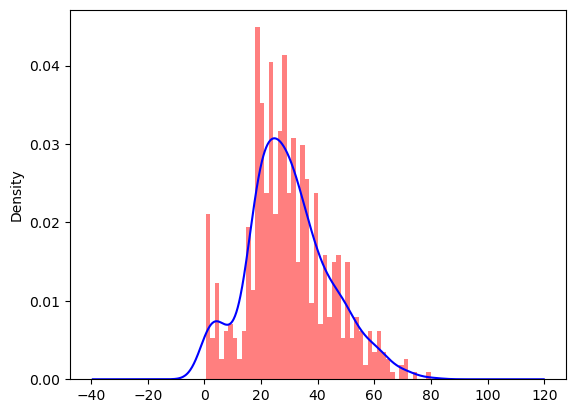

In [6]:
ax = train_df["Age"].hist(bins =50,density = True,color = "red",alpha = 0.5)
train_df["Age"].plot(kind = "density",color ="blue")
#aplha = transparency
# .hist is a method of pandas panadas uses matplotlib at the end
# the graph is made based on the number of people in ax and plotted by traindf wala 2nd continious graph

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

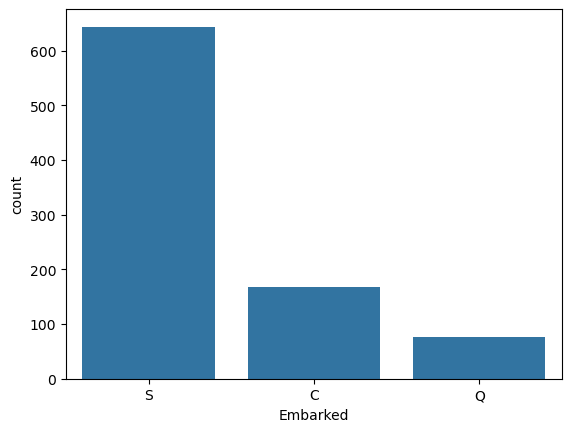

In [7]:
print(train_df['Embarked'].value_counts())
sns.countplot(x = 'Embarked',data = train_df)
#number of people who boarded from each port

In [8]:
train_data = train_df.copy()

# To fill missing values we have 3 options :-
* 1. replace it with zeroes - it is a blunder
  2. replace it with mean
  3. replace with median

* second and third choice depends on question

# Age

In [9]:
train_data['Age'].fillna(train_df['Age'].median(),inplace = True)

* inplace = true it makes changes in the actual data otherwise changes takes place in its copy

# Cabin
* We will drop cabin column coz 80% data is missing in the dataset so we can't recreate the data 

# Embarked
* We will take mode

In [10]:
train_data['Embarked'].fillna(train_df.Embarked.value_counts().idxmax(), inplace = True)
train_data.drop("Cabin",axis =1, inplace = True)

In [11]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

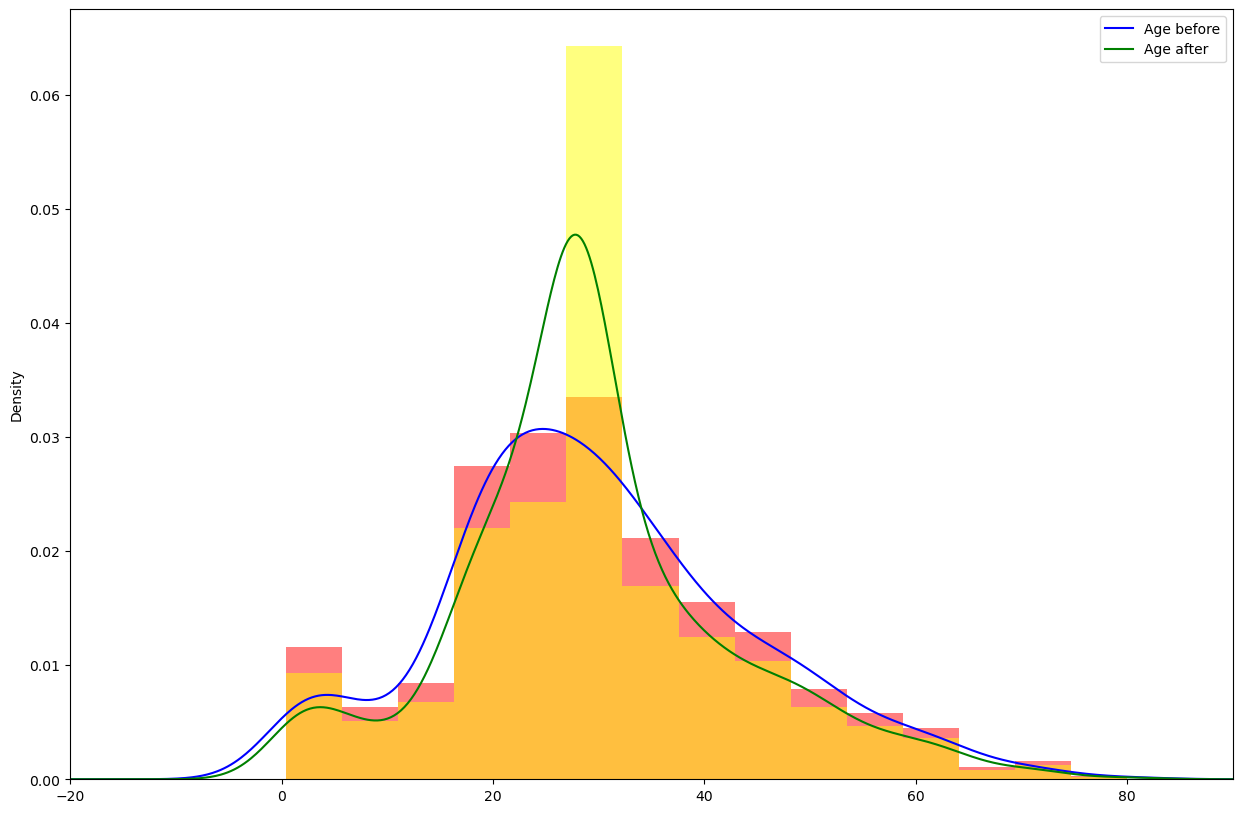

In [13]:
plt.figure(figsize = (15,10))
ax = train_df["Age"].hist(bins =15,density = True,color = "red",alpha = 0.5)
train_df["Age"].plot(kind = "density",color ="blue")
ax = train_data["Age"].hist(bins =15,density = True,color = "yellow",alpha = 0.5)
train_data["Age"].plot(kind = "density",color ="green")
plt.xlim(-20,90) #range of x
ax.legend(['Age before','Age after'])
# this shows that our distribution may have gotten skewed a little but remained same overall
# change in distribution before and after nan values removal

# FEATURE SELECTION
* pclass = better class better survival
* dropping = name, passid, ticketno

# STRING TO INT
* MALE AND FEMALE KO

In [14]:
train_data = pd.get_dummies(train_data,columns = ['Sex','Embarked'])

In [15]:
train_data.drop("PassengerId",axis =1,inplace = True)
train_data.drop("Name",axis =1,inplace = True)
train_data.drop("Ticket",axis =1,inplace = True)

In [16]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


# To change true false to zero one

In [17]:
train_data['Sex_female'] = np.where(train_data['Sex_female']== True ,1,0)
train_data['Sex_male'] = np.where(train_data['Sex_male']== True ,1,0)
train_data['Embarked_C'] = np.where(train_data['Embarked_C']== True ,1,0)
train_data['Embarked_Q'] = np.where(train_data['Embarked_Q']== True ,1,0)
train_data['Embarked_S'] = np.where(train_data['Embarked_S']== True ,1,0)

In [18]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


# AGE SIGNIFICANCE IN DATASET

C:\Users\PALAK\AppData\Local\Temp\ipykernel_24292\266310589.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data["Age"][train_data.Survived ==1],color = 'green',shade = True)
C:\Users\PALAK\AppData\Local\Temp\ipykernel_24292\266310589.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data["Age"][train_data.Survived ==0],color = 'red',shade = True)
C:\Users\PALAK\AppData\Local\Temp\ipykernel_24292\266310589.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Survived","Dead")


(-20.0, 90.0)

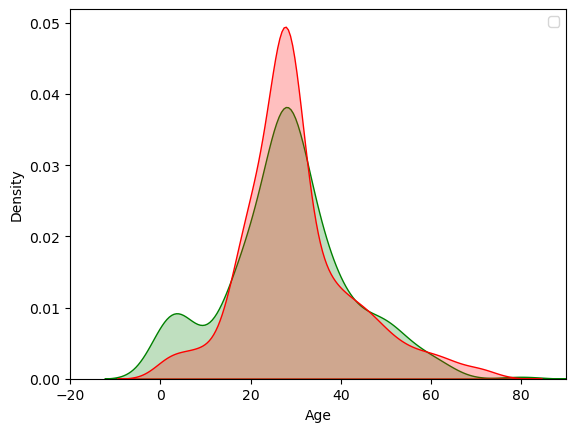

In [19]:
ax = sns.kdeplot(train_data["Age"][train_data.Survived ==1],color = 'green',shade = True)
sns.kdeplot(train_data["Age"][train_data.Survived ==0],color = 'red',shade = True)
plt.legend("Survived","Dead")
plt.xlim(-20,90)
#kdeplot = continous data plot

### Why this graph shows people of middle age (around 25) as maxi dead and survived both as everthing in nature follows Gaussian distribution

# FARE SIGNIFICANCE IN DATASET

C:\Users\PALAK\AppData\Local\Temp\ipykernel_24292\3664395696.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data["Fare"][train_data.Survived ==1],color = 'green',shade = True)
C:\Users\PALAK\AppData\Local\Temp\ipykernel_24292\3664395696.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data["Fare"][train_data.Survived ==0],color = 'red',shade = True)
C:\Users\PALAK\AppData\Local\Temp\ipykernel_24292\3664395696.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Survived","Dead")


(-20.0, 90.0)

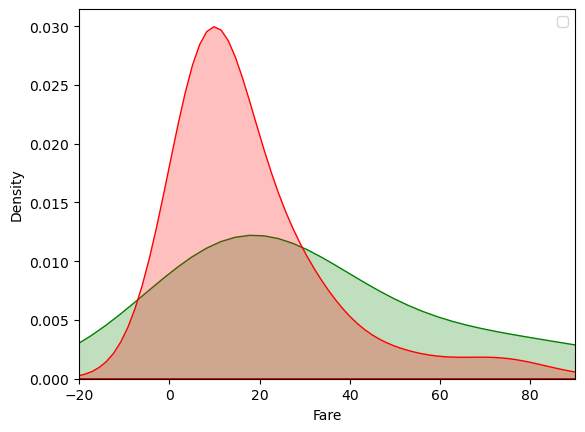

In [20]:
ax = sns.kdeplot(train_data["Fare"][train_data.Survived ==1],color = 'green',shade = True)
sns.kdeplot(train_data["Fare"][train_data.Survived ==0],color = 'red',shade = True)
plt.legend("Survived","Dead")
plt.xlim(-20,90)

### This shows that number of people who paid more faire survived more (almost all survived), but there are more rooms in normal class as compared to first class so people who paid less survived less (total mai se)
* like 100 log h normal fair wale toh 25 bache but 1st class wale 100 h toh 90 bach gye
* the bar is high towards normal fair because number of people are more but in high fare the number of people are less but survival rate is very high

# RELATION BTW PCLASS AND SURVIVAL

<Axes: xlabel='Pclass', ylabel='Survived'>

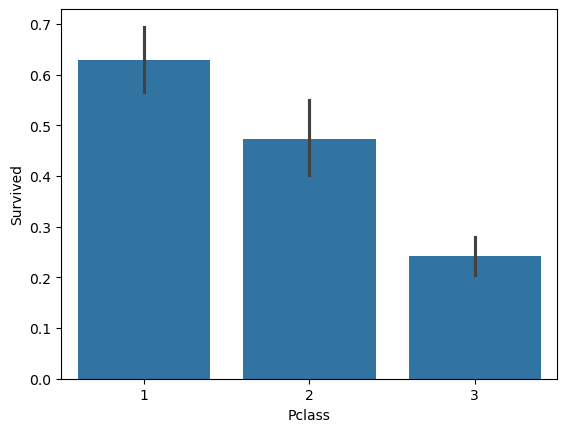

In [21]:
sns.barplot(x ="Pclass",y ="Survived",data = train_data)

### This shows that people of first class have the highest chance of surviving followed by 2 and 3

# IMPACT OF EMBARKED :-

<Axes: xlabel='Embarked', ylabel='Survived'>

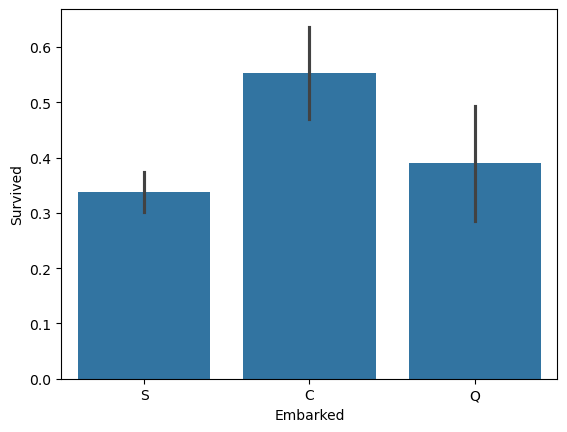

In [22]:
sns.barplot(x ="Embarked",y ="Survived",data = train_df)

### This shows people boarding from cherbourg have more chances of survival

# IMPACT OF SIBSP:-

<Axes: xlabel='SibSp', ylabel='Survived'>

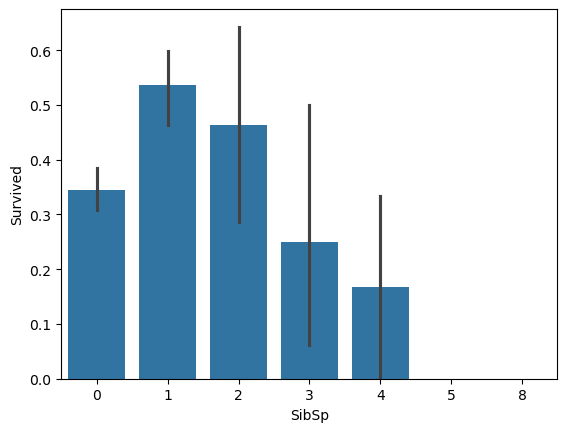

In [23]:
sns.barplot(x ="SibSp",y ="Survived",data = train_df)

### This shows that that people whi have 1 or 2 sbisp have higher chances of survival

# IMPACT OF PARCH:-

<Axes: xlabel='Parch', ylabel='Survived'>

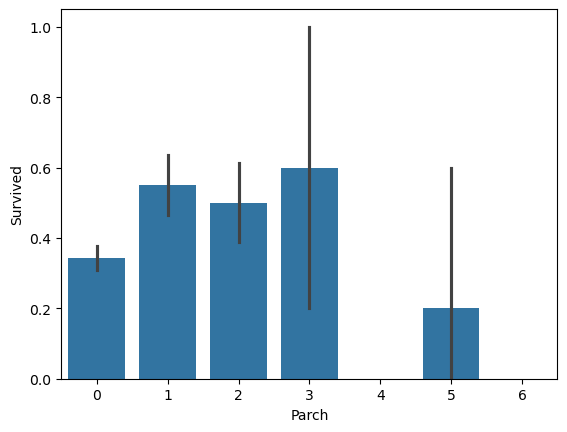

In [24]:
sns.barplot(x ="Parch",y ="Survived",data = train_df)

### not that helpful

# IMPACT OF GENDER:-

<Axes: xlabel='Sex', ylabel='Survived'>

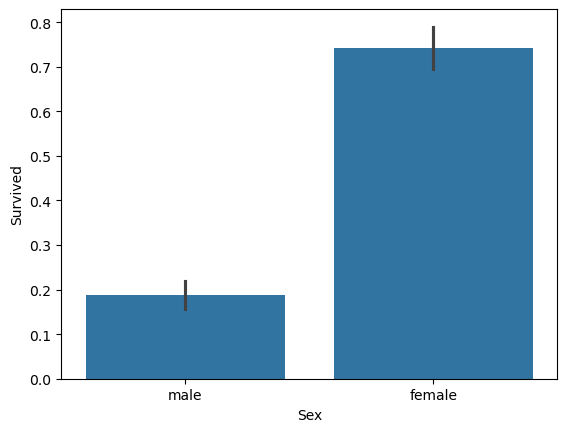

In [25]:
sns.barplot(x ="Sex",y ="Survived",data = train_df)

### This shows females have higher chances of survival than males

<Axes: xlabel='Sex', ylabel='Fare'>

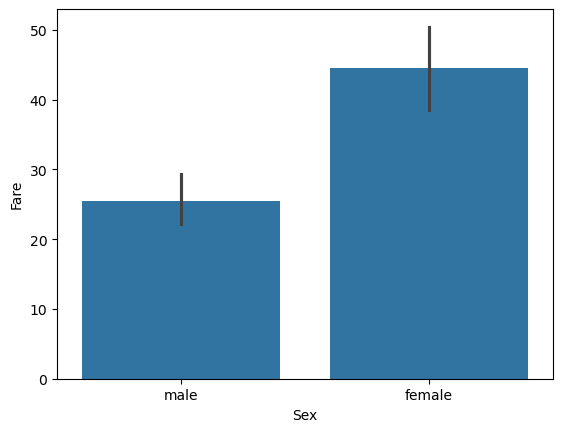

In [26]:
sns.barplot(x ="Sex",y ="Fare",data = train_df)

### This shows female purchased tickets of high fare more

# Combining sibsp and parch into travel alone

In [27]:
train_data["Travel_alone"]=np.where((train_data['SibSp']+train_data['Parch']) >0,0,1)

In [28]:
train_data.drop("SibSp",axis =1,inplace = True)
train_data.drop("Parch",axis =1,inplace = True)

In [29]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Travel_alone
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,1
887,1,1,19.0,30.0000,1,0,0,0,1,1
888,0,3,28.0,23.4500,1,0,0,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,1


<Axes: xlabel='Travel_alone', ylabel='Survived'>

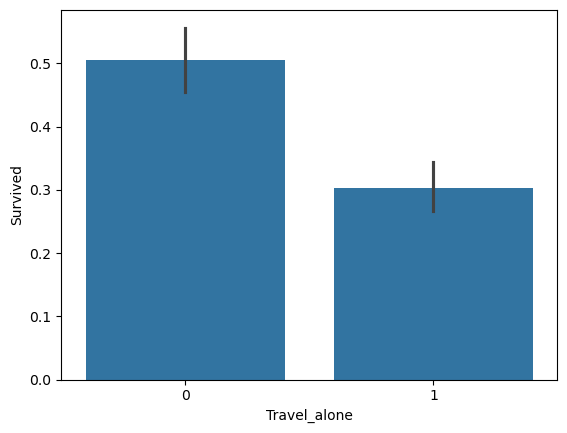

In [30]:
sns.barplot(x ="Travel_alone",y ="Survived",data = train_data)

### This is better than parch ans sibsp and this shows people who travel alone have lower chances of survival

# Correlation Graph:-

In [31]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


<Axes: >

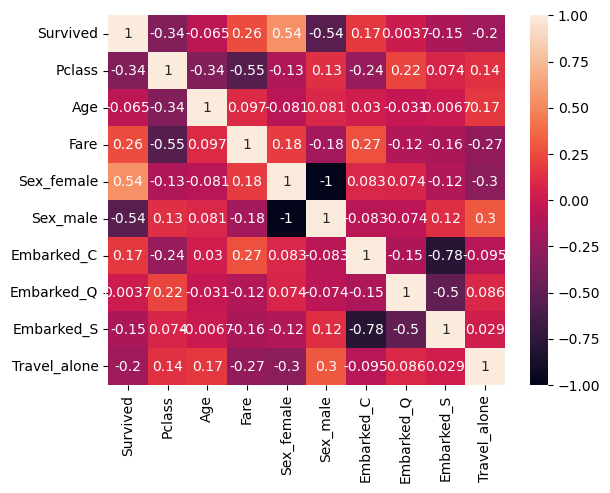

In [32]:
sns.heatmap(train_data.corr(), annot = True)

In [33]:
# covariance and correlation

In [34]:
cols_model = ['Pclass','Age','Fare',"Sex_female",'Sex_male','Embarked_C','Embarked_Q','Embarked_S','Travel_alone']
train_X = train_data[cols_model]
train_Y = train_data['Survived']

* This data is in pandas format which is dataframe so it does not allow slicing

In [35]:
print(type(train_X),type(train_Y))
#this is to convert pandas dataframe to numpy array
train_X = train_X.values
train_Y = train_Y.values
print(type(train_X),type(train_Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [36]:
split = 0.9
X_train = train_X[:int(split*train_X.shape[0]), :]
Y_train = train_Y[:int(split*train_Y.shape[0])]
X_test = train_X[int(split*train_X.shape[0]):, :]
Y_test = train_Y[int(split*train_Y.shape[0]):]

In [37]:
X_train

array([[ 3.    , 22.    ,  7.25  , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    , 38.    , 71.2833, ...,  0.    ,  0.    ,  0.    ],
       [ 3.    , 26.    ,  7.925 , ...,  0.    ,  1.    ,  1.    ],
       ...,
       [ 3.    , 30.    ,  7.2292, ...,  0.    ,  0.    ,  1.    ],
       [ 3.    , 30.    , 24.15  , ...,  0.    ,  1.    ,  0.    ],
       [ 2.    , 34.    , 13.    , ...,  0.    ,  1.    ,  1.    ]])

In [38]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(801, 9) (801,) (90, 9) (90,)


# Normalisation 
* we do column wise linear regression cause if ek col ka mean(u) and sigma is diff than other so we normalise using columns

#### Here we will not normalise coz we normalise the values so that they don't become nan but these values are already small we can normalise age and fare but it is not needed
* embarked m 0,0,1 wale values h but if we normalise
* let u(c) = 0.5,u(q)=0.1,u(s)=0,4 and sigma = 1 for all
* if we cal x(C) = 0-0.5/1 = 0.5,x(Q) = 0.1, x(S) = 0.4 this will not show any correct result so normalisation not needed

## We generally believe that bernaulli distribution m normalisation nhi krte but we can same accuracy

* we can normalise age but values are small

In [39]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))

In [40]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(801, 10) (801,) (90, 10) (90,)


In [41]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [42]:
def hypothesis(X,weight):
    return sigmoid(np.dot(X,weight))

In [43]:
def loss(X,Y,weight):
    pred = hypothesis(X,weight)
    loss = np.mean(Y *np.log(pred)+(1-Y)*np.log(1-pred))
    return -1*loss

In [44]:
def gradient(X,Y,weight):
    pred = hypothesis(X,weight)
    grad = np.dot(X.T,(Y-pred)) # x.t before so that we get 1,1 not m,m
    return grad/X.shape[0]

In [45]:
def gradient_des(X,Y):
    weights = np.zeros((X.shape[1],)) 
    epochs = 100000 #no of jumps
    lr_rate = 0.003 
    # here we take 0.003 as loss number to avoid nan values
    list_loss = []
    for i in range(epochs):
        grad = gradient(X,Y,weights)
        list_loss.append(loss(X,Y,weights))
        print(f'On:{i}',end = '\r')
        weights= weights+(lr_rate*grad)
    return weights,list_loss

In [46]:
weights,list_loss = gradient_des(X_train,Y_train)

In [47]:
list_loss[:10] 

[0.6931471805599451,
 0.6482165240738683,
 0.6365160504362694,
 0.6322504134892498,
 0.6294194740352896,
 0.6281237636700449,
 0.6271042578027656,
 0.6266084734328731,
 0.6262674933922432,
 0.6260527444269302]

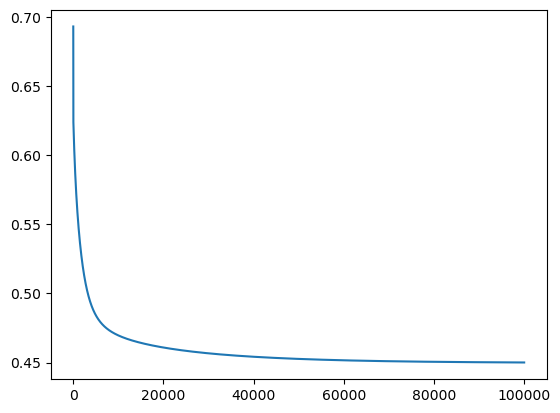

In [48]:
plt.plot(list_loss)

In [49]:
weights

array([ 1.64674796e+00, -1.04845818e+00, -2.86858506e-02,  7.94682108e-04,
        2.14187844e+00, -4.95130484e-01,  7.17785540e-01,  6.10701638e-01,
        3.18260778e-01,  1.53384121e-01])

In [50]:
pred = []

for i in range(X_test.shape[0]):
    y_hat = hypothesis(X_test[i],weights)
#     pred.append(y_hat)
    print(y_hat,Y_test[i])
    if y_hat >=0.5:
        pred.append(1)
    else:
        pred.append(0)
     

0.7579677484332348 1
0.5501402960657976 1
0.21733726293541258 1
0.09186380770618424 1
0.08277741724608342 0
0.36727058875764446 0
0.6467377305410951 0
0.17050233578347251 0
0.8960413690112959 1
0.09434704478022532 0
0.06775680815772324 0
0.18704681370741225 0
0.6930146711162395 0
0.0838897390376005 0
0.4431470295719828 0
0.6133509961912418 0
0.2521141981110608 0
0.06005965750578257 0
0.12562773505861616 0
0.8376801450000262 1
0.09197574385022286 1
0.37396170732818024 0
0.5490686391441004 1
0.15429176363316963 0
0.11636090678043201 0
0.0927576205126222 0
0.4435436224131058 1
0.11642629076178264 1
0.817106428026063 1
0.7195511238070156 1
0.3461632816243199 1
0.12785640228918882 0
0.1019589826002656 0
0.11589803345221146 0
0.9172298035046703 1
0.1073949451606585 0
0.08956818770210816 0
0.0835422718959525 1
0.5485285502272973 1
0.11011849234524514 0
0.2840859187490158 0
0.9413317814525227 1
0.10840541480866343 0
0.11890006556963807 0
0.06175025582925399 0
0.0814034045391472 0
0.10713769213

In [51]:
# accuracy
corr =0

for i in range(Y_test.shape[0]):
    if pred[i] == Y_test[i]:
        corr +=1
print(corr/Y_test.shape[0])

0.8


In [52]:
#loss kam learning kam make notes from this from one note

In [77]:
def prior_probab(y_train,label):
    return np.sum(y_train==label)/y_train.shape[0]

In [78]:
def conditional_prob(x_train,y_train,feat_col,value,label):
    x_train = x_train[y_train == label]
    num = np.sum(x_train[:,feat_col] == value)
    deno = np.sum(y_train==label)
    return num/deno

In [79]:
def predict(x_train, y_train , x_test):
    classes = np.unique(y_train)
    n_feat = x_train.shape[1]
    post_probab =[]
    
    for label in classes:
        likelihood_prob = 1
        
        for col in range(n_feat):
            likelihood_prob = conditional_prob(x_train, y_train,col,x_test[col], label)
        
        prior = prior_probab(y_train,label)
        
        post_probab.append(likelihood_prob*prior)
        
    return np.argmax(post_probab)

In [84]:
print(predict(X_train,Y_train, X_test[0]), Y_test[14])

0 0


In [85]:
corr = 0

for i in range(X_test.shape[0]):
    pred = predict(X_train,Y_train, X_test[i])
    if pred ==Y_test[i]:
        corr+=1
    else:
        pass
print(corr/X_test.shape[0])

0.6222222222222222
